[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

0.9824561403508771


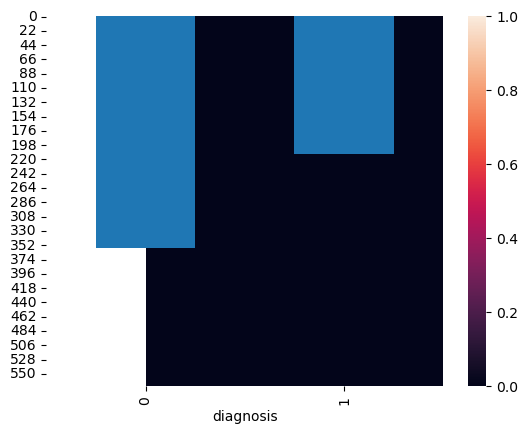

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report ,accuracy_score
from sklearn.metrics import confusion_matrix , pair_confusion_matrix

data = pd.read_csv('data.csv')
data.head(20)

data.shape
data.info
data.isnull().sum()
sns.heatmap(data.isna())
data['diagnosis'].value_counts()
data.columns
data.drop(['id' , 'Unnamed: 32' ] , axis=1 , inplace=True )
data['diagnosis'].replace({"M" : "1" , "B" : "0"} , inplace=True )
data.head()
data['diagnosis'].value_counts().plot(kind='bar')


X = data.drop(['diagnosis'] , axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)
model = LogisticRegression()
model.fit(X_train , y_train)
pred = model.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))